<a href="https://colab.research.google.com/github/Moly-malibu/100-Days-Of-ML-Code/blob/master/RX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U -q PyDrive

In [2]:
import pandas as pd

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import drive

drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [3]:
directory='drive/My Drive/chest_xray/chest_xray',

In [4]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

uploaded = drive.CreateFile({'title': 'chest_xray/chest_xrayt'})
uploaded.SetContentString('Sample upload file content')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 17ZMK-MuVQ_NLiOynVDs7PngqidpBGExz


In [5]:
downloaded = drive.CreateFile({'id': uploaded.get('id')})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

Downloaded content "Sample upload file content"


In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image
import tensorflow as tf
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import MaxPooling2D
from tensorflow.keras.models import Sequential, Model  
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [91]:
from pathlib import Path

# Load data with path
master = Path('/gdrive/My Drive/chest_xray/chest_xray')
train = master / 'train'
val = master / 'val'
test = master / 'test'

In [92]:
#Path to the normal and pneumonia sub-directories
normal_lung = train / 'NORMAL'
pneumonia_lung = train / 'PNEUMONIA'

# Get all the images
normal_0 = normal_lung.glob('*.jpeg')
pneumonia_1 = pneumonia_lung.glob('*.jpeg')

train_data = [] #insert the data into this list

for img in normal_0: #get all the normal cases = 0. 
    train_data.append((img,0))

for img in pneumonia_1: #get all the pneumonia cases = 1. 
    train_data.append((img, 1))
  
train_data = pd.DataFrame(train_data, columns=['image', 'label'],index=None) #convert with pandas dataframe from the data list
train_data = train_data.sample(frac=1.).reset_index(drop=True) # sample and reset index data 
train_data.head()

,image,label
0,/gdrive/My Drive/chest_xray/chest_xray/train/P...,1
1,/gdrive/My Drive/chest_xray/chest_xray/train/N...,0
2,/gdrive/My Drive/chest_xray/chest_xray/train/P...,1
3,/gdrive/My Drive/chest_xray/chest_xray/train/P...,1
4,/gdrive/My Drive/chest_xray/chest_xray/train/P...,1


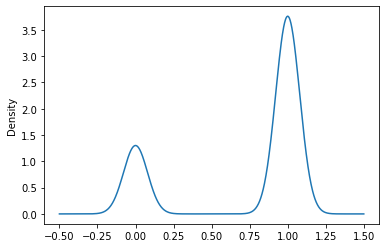

In [93]:
train_data['label'].plot.density();

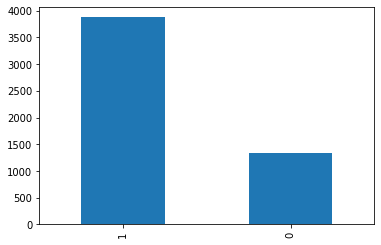

In [94]:
train_data['label'].value_counts().plot(kind='bar');

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



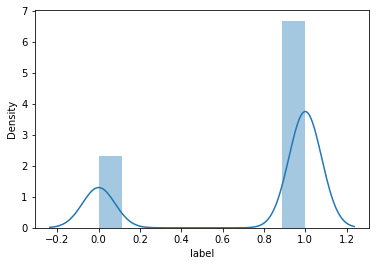

In [95]:
%matplotlib inline
import seaborn as sns
sns.distplot(train_data['label']);

In [96]:
import plotly.express as px
import seaborn as sns

cases_count_1 = train_data['label'].value_counts()
px.scatter(x=cases_count_1.index, y= cases_count_1.values, opacity=0.05, trendline='ols')
px.scatter(range(len(cases_count_1.index)), ['lung Normal(0)', 'lung with Pneumonia(1)'])

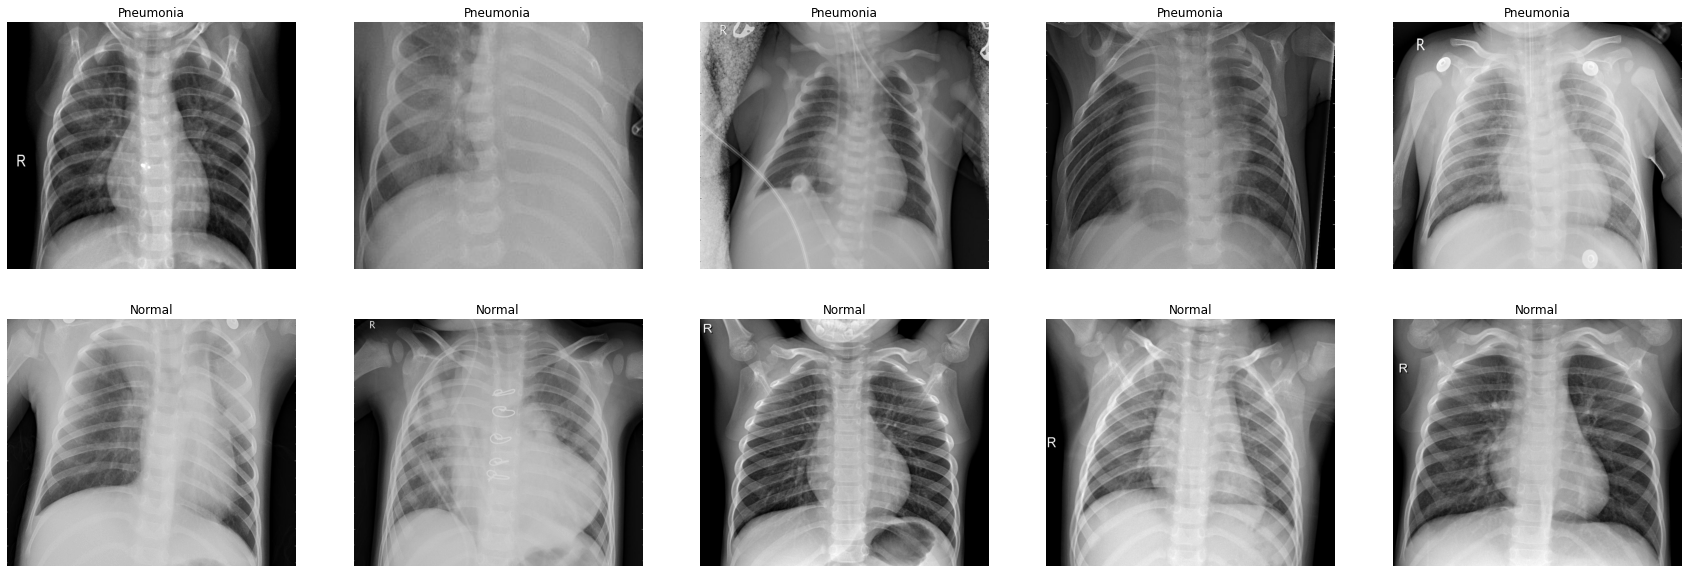

In [98]:
from skimage.io import imread

#Samples each classes
pneumonia_samples = (train_data[train_data['label']==1]['image'].iloc[:7]).tolist()
normal_samples = (train_data[train_data['label']==0]['image'].iloc[:7]).tolist()

# Concat the data both list
samples = pneumonia_samples + normal_samples
del pneumonia_samples, normal_samples

# Plot the data 
f, graph = plt.subplots(2,5, figsize=(30,10))
for i in range(10):
    img = imread(samples[i])
    graph[i//5, i%5].imshow(img, cmap='gray')
    if i<5:
        graph[i//5, i%5].set_title("Pneumonia")
    else:
        graph[i//5, i%5].set_title("Normal")
    graph[i//5, i%5].axis('off')
    graph[i//5, i%5].set_aspect('auto')
plt.show()

Healthy lung : NORMAL2-IM-0490-0001.jpeg
Positive for Pneumonia: person63_bacteria_306.jpeg


Text(0.5, 1.0, 'Positive for Pneumonia')

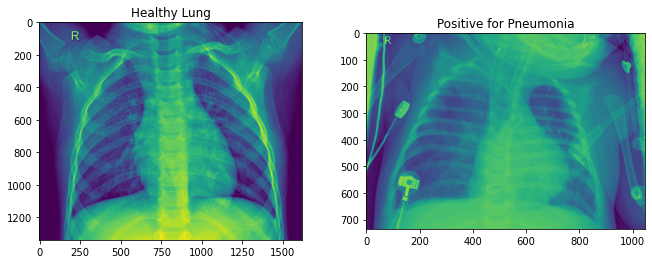

In [57]:
#Randon sampling both classess
master = os.listdir('/gdrive/My Drive/chest_xray/chest_xray')
train = '/gdrive/My Drive/chest_xray/chest_xray/train/'
val= '/gdrive/My Drive/chest_xray/chest_xray/val/'
test= '/gdrive/My Drive/chest_xray/chest_xray/test/'

os.listdir(train)
train_normal=train+'NORMAL/'
train_pneumonia=train+'PNEUMONIA/'

num_healthy_tr = len(os.listdir(train))
num_pneumonia_tr = len(os.listdir(train))

num_healthy_val = len(os.listdir(val))
num_pneumonia_val = len(os.listdir(val))

total_train= num_healthy_tr +  num_pneumonia_tr
total_val = num_healthy_val + num_pneumonia_val

hale_rand = np.random.randint(0, len(os.listdir(train_normal)))
hale_pic = os.listdir(train_normal)[hale_rand]
print('Healthy lung :', hale_pic)

hale_test = train_normal + hale_pic

#Lung sick Pneumonia
Pneumonia_rand = np.random.randint(0, len(os.listdir(train_pneumonia)))
sick = os.listdir(train_pneumonia)[hale_rand]
sick_test = train_pneumonia + sick
print('Positive for Pneumonia:', sick)
healthy_lung = Image.open(hale_test)
sick_lung = Image.open(sick_test)

#Sampling Lung random
lung = plt.figure(figsize=(11,4))
test_a1 = lung.add_subplot(1,2,1)
img_lung = plt.imshow(healthy_lung)
test_a1.set_title('Healthy Lung')
test_a2 = lung.add_subplot(1,2,2)
img_lung= plt.imshow(sick_lung)
test_a2.set_title('Positive for Pneumonia')

In [58]:
batch_size = 16
epochs = 50
img_height = 224
img_width = 224
train_sample = 5217
val_sample = 17

In [59]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

In [60]:
train_generator = train_data_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train,
                                                           shuffle=True,
                                                           target_size=(img_height, img_width),
                                                           class_mode='binary')

Found 5217 images belonging to 2 classes.


In [61]:
validation_generator = test_data_generator.flow_from_directory(
        val,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 16 images belonging to 2 classes.


In [62]:
test_generator = test_data_generator.flow_from_directory(test, 
                                                         target_size=(img_width, img_height),
                                                         batch_size=batch_size,
                                                         class_mode='binary')

Found 624 images belonging to 2 classes.


In [36]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

#Model
resnet = ResNet50(weights='imagenet', include_top=False )

for layer in resnet.layers:
    layer.trainable = False

x = resnet.output
x = GlobalAveragePooling2D()(x) #layer flatten
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(resnet.input, predictions)

94773248/94765736 [==============================] - 0s 0us/step


In [37]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [39]:

history_1m=model.fit(
        train_generator,
        steps_per_epoch=10,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=500)

Epoch 1/50
10/10 [==============================] - 38s 4s/step - loss: 1.0198 - accuracy: 0.6313 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/50
10/10 [==============================] - 34s 3s/step - loss: 0.8051 - accuracy: 0.6125
Epoch 3/50
10/10 [==============================] - 34s 3s/step - loss: 0.6715 - accuracy: 0.6125
Epoch 4/50
10/10 [==============================] - 33s 3s/step - loss: 0.5797 - accuracy: 0.7625
Epoch 5/50
10/10 [==============================] - 34s 3s/step - loss: 0.6053 - accuracy: 0.7188
Epoch 6/50
10/10 [==============================] - 31s 3s/step - loss: 0.4800 - accuracy: 0.7688
Epoch 7/50
10/10 [==============================] - 28s 3s/step - loss: 0.4648 - accuracy: 0.7875
Epoch 8/50
10/10 [==============================] - 27s 3s/step - loss: 0.4931 - accuracy: 0.7563
Epoch 9/50
10/10 [==============================] - 25s 3s/step - loss: 0.4481 - accuracy: 0.7875
Epoch 10/50
10/10 [==============================] - 26s 3s/step - loss: 0.4

In [40]:
# evaluate the model
scores_1m = model.evaluate_generator(test_generator)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores_1m[1]*100))

Instructions for updating:
Please use Model.evaluate, which supports generators.

accuracy: 78.04%


In [63]:
# Setup Architecture

custom_cnn = Sequential([
    Conv2D(64, (3,3), input_shape=(224, 224, 3), padding='same', activation='relu'),
    MaxPooling2D((2,2), padding='same'),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(16, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(8,(2,2), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
custom_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 110, 110, 32)      18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 53, 53, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 8)         5

In [64]:
#compile Model
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [65]:
train_data = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [66]:
test_data = ImageDataGenerator(rescale=1. / 255)

In [67]:
train_generator = train_data.flow_from_directory(
    train,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 5217 images belonging to 2 classes.


In [68]:
validation_generator = test_data.flow_from_directory(
    val,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 16 images belonging to 2 classes.


In [69]:
test_generator = test_data.flow_from_directory(
    test,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 624 images belonging to 2 classes.


In [70]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_sample // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=val_sample// batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
326/326 [==============================] - 298s 915ms/step - loss: 0.4808 - accuracy: 0.7708 - val_loss: 0.6301 - val_accuracy: 0.6250
Epoch 2/50
326/326 [==============================] - 120s 368ms/step - loss: 0.4310 - accuracy: 0.7950 - val_loss: 1.1980 - val_accuracy: 0.5625
Epoch 3/50
326/326 [==============================] - 120s 369ms/step - loss: 0.4125 - accuracy: 0.7989 - val_loss: 0.5434 - val_accuracy: 0.8125
Epoch 4/50
326/326 [==============================] - 121s 370ms/step - loss: 0.3944 - accuracy: 0.8131 - val_loss: 0.8397 - val_accuracy: 0.6250
Epoch 5/50
326/326 [==============================] - 120s 367ms/step - loss: 0.3798 - accuracy: 0.8148 - val_loss: 1.2958 - val_accuracy: 0.5625
Epoch 6/50
326/326 [==============================] - 120s 368ms/step - loss: 0.3698 - accuracy: 0.8243 - val_loss: 0.9428 - val_accuracy: 0.6250
Epoch 7/50
326/326 [============================

In [72]:
# evaluate the model
scores = model.evaluate_generator(test_generator)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


accuracy: 76.60%


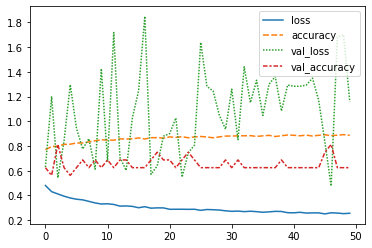

In [73]:
import pandas as pd
import seaborn as sns

sns.lineplot(data=pd.DataFrame(history.history));

In [74]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from skimage.exposure import rescale_intensity
from skimage.color import rgb2gray
import os
from PIL import Image
import numpy as np

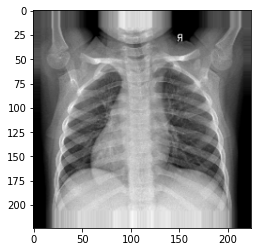

In [75]:
import matplotlib.pyplot as plt

lung = train_generator[0][0][9]
plt.imshow(lung);

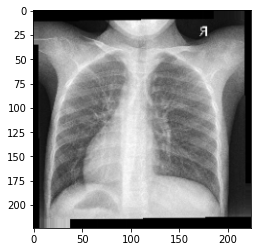

In [76]:
pneumonia = train_generator[1][0][15]
plt.imshow(pneumonia);

In [77]:
import imageio
import matplotlib.pyplot as plt
from skimage import color, io
from skimage.exposure import rescale_intensity

rx_grayscale = rescale_intensity(color.rgb2gray(lung))
rx_grayscale.shape

(224, 224)

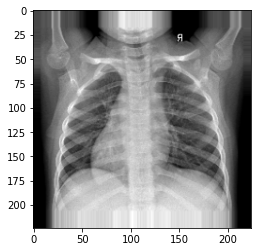

In [78]:
plt.imshow(rx_grayscale, cmap="gray");

In [79]:
rx_grayscale.shape

(224, 224)

In [80]:
import numpy as np
import scipy.ndimage as nd

horizontal_edge_convolution = np.array([[1,1,1],
                                        [0,0,0],
                                        [-1,-1,-1]])

vertical_edge_convolution = np.array([[1, 0, -1],
                                     [1, 0, -1],
                                     [1, 0, -1]])

rx_horizontal = nd.convolve(rx_grayscale, horizontal_edge_convolution)
rx_vertical = nd.convolve(rx_grayscale, vertical_edge_convolution)

rx_horizontal.shape

(224, 224)

In [81]:
rx_grayscale[0,0]

0.28019044

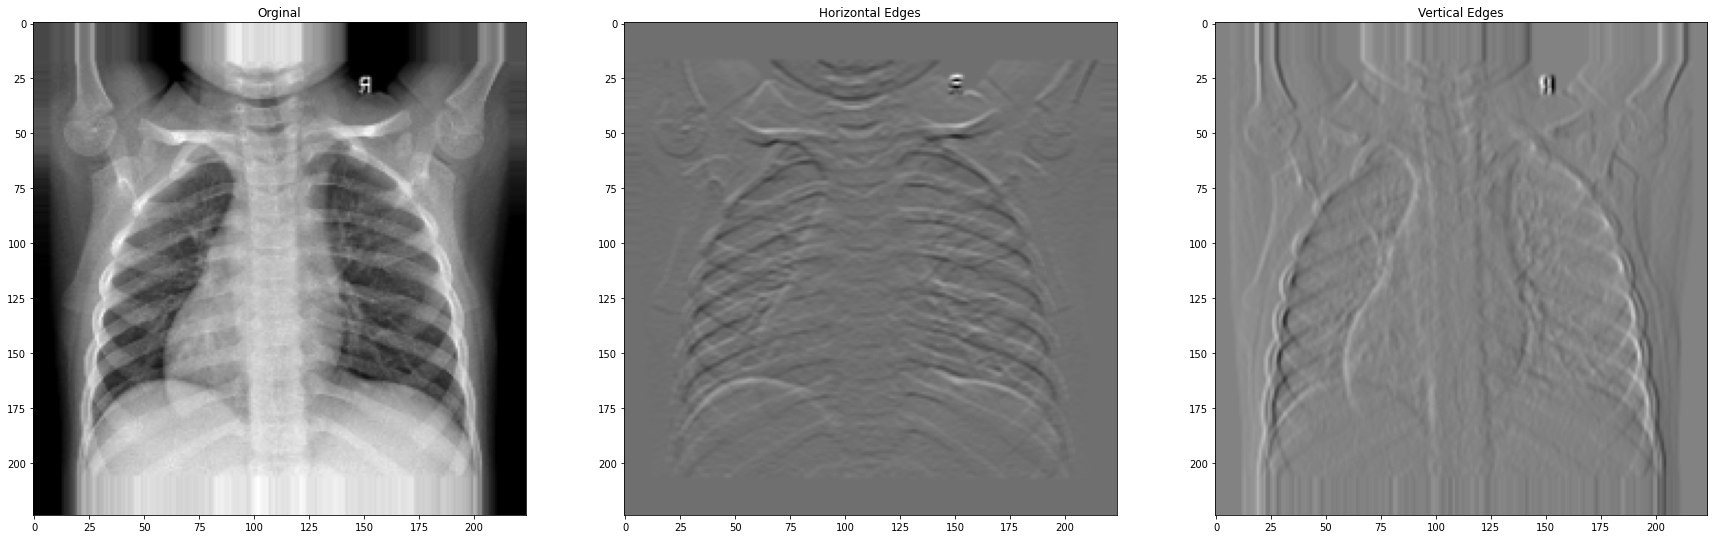

In [82]:
plt.figure(figsize=(30,10))

labels = ["Orginal", "Horizontal Edges", "Vertical Edges"]
images = [rx_grayscale, rx_horizontal, rx_vertical]

i = 0
for label, image in zip(labels, images):

    plt.subplot(1,3,i+1)
    plt.grid(False)
    plt.imshow(image, cmap="gray")
    plt.title(label)
    i += 1 

plt.show()

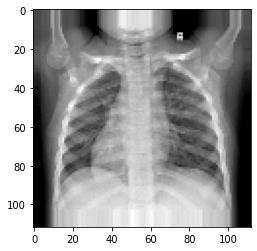

In [83]:
from skimage.measure import block_reduce

reduced = block_reduce(rx_grayscale, (2,2), np.max)
plt.imshow(reduced, cmap="gray");

39/39 - 7s - loss: 0.5110 - accuracy: 0.7660


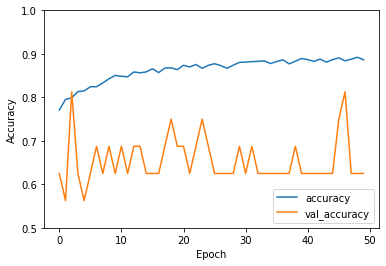

In [84]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_generator, verbose=2)